# 4. multicollinearity

In [1]:
suppressPackageStartupMessages({
  library(tidyverse)
  library(tidymodels)
  library(readxl)
  library(multcomp)
  library(car)
})

In [2]:
df <- read_excel("data/Table4_2.xls")
head(df,3)

expend,income,wealth
<dbl>,<dbl>,<dbl>
70,80,810
65,100,1009
90,120,1273


In [3]:
model <- lm(expend ~ income + wealth, data = df)
tidy(model)
glance(model)$r.squared

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),24.77473327,6.75249960,3.6689722,0.007975077
income,0.94153734,0.82289826,1.1441722,0.290164748
wealth,-0.04243453,0.08066448,-0.5260621,0.615094539


[1] 0.9635044

none of the slope coeffi cients is statistically
signifi cant, as the t values are statistically insignificant. Yet the R2 value is very high.

In [4]:
model2 <- lm(expend ~ income, data = df)
tidy(model2)
glance(model2)$r.squared

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),24.4545455,6.41381730,3.812791,5.142172e-03
income,0.5090909,0.03574281,14.243171,5.752746e-07


[1] 0.9620616

 income alone has significant impact on expenditure, 

In [5]:
model3 <- lm(expend ~ wealth, data = df)
tidy(model3)
glance(model3)$r.squared

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),24.41104485,6.874096840,3.551164,7.496699e-03
wealth,0.04976377,0.003743986,13.291656,9.802080e-07


[1] 0.956679

wealth alone has a significant impact on expenditure

In [6]:
model4 <- lm(wealth ~ income, data = df)
tidy(model4)
glance(model4)$r.squared

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),7.545455,29.4758107,0.255988,8.044195e-01
income,10.190909,0.1642623,62.040474,5.064901e-12


[1] 0.9979259

wealth and income are highly related 

## Example

In [7]:
df2 <- read_excel("data/Table4_4.xls")
head(df2,3)

taxableinc,federaltax,hsiblings,hfathereduc,hmothereduc,siblings,lfp,hours,kidsl6,kids618,⋯,hage,heduc,hwage,faminc,mtr,mothereduc,fathereduc,unemployment,largecity,exper
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
12200,1494,1,14,16,4,1,1610,1,0,⋯,34,12,4.0288,16310,0.7215,12,7,5,0,14
18000,2615,8,7,3,0,1,1656,0,2,⋯,30,9,8.4416,21800,0.6615,7,7,11,1,5
24000,3957,4,7,10,2,1,1980,1,3,⋯,40,12,3.5807,21040,0.6915,12,7,5,0,15


Hours: hours worked in 1975 (dependent variable)  
Kidslt6: number of kids under age 6  
Kidsge6: number of kids between ages 6 and 18  
Age: woman’s age in years  
Educ: years of schooling  
Wage: estimated wage from earnings  
Hushrs: hours worked by husband  
Husage: husband’s age  
Huseduc: husband’s years of schooling  
Huswage: husband’s hourly wage, 1975  
Faminc: family income in 1975  
Mtr: federal marginal tax rate facing a woman  
motheduc: mother’s years of schooling  
fatheduc: father’s years of schooling  
Unem: unemployment rate in county of residence  
exper: actual labor market experience  


assess the impact of several socio-economic variables on married women’s hours of work
in the labor market. This is cross-sectional data on 753 married women for the year
1975. It should be noted that there were 325 married women who did not work and
hence had zero hours of work.

In [8]:
model5 <- lm(hours ~ age + educ + exper + faminc + fathereduc + 
            hage + heduc + hhours + hwage + kidsl6 + kids618 +
            wage + mothereduc + mtr + unemployment, data = df2)

tidy(model5)
glance(model5)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),5805.4723070,6.843439e+02,8.4832671,1.194368e-16
age,-24.0044110,6.859174e+00,-3.4996069,4.939481e-04
educ,-13.7760578,1.528931e+01,-0.9010257,3.678690e-01
exper,34.9538799,3.456319e+00,10.1130377,1.331411e-22
faminc,0.0156683,4.641855e-03,3.3754394,7.755884e-04
fathereduc,-4.8206771,8.673176e+00,-0.5558145,5.785063e-01
hage,-5.0282298,6.669922e+00,-0.7538664,4.511702e-01
heduc,-11.6952485,1.101195e+01,-1.0620504,2.885607e-01
hhours,-0.3389067,5.107115e-02,-6.6359714,6.246245e-11


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.434307,0.4227936,661.9732,37.72179,8.317512e-81,15,-5951.279,11936.56,12015.17,322959634,737,753


In [9]:
colnames(df2)

[1] "taxableinc"   "federaltax"   "hsiblings"    "hfathereduc"  "hmothereduc" 
 [6] "siblings"     "lfp"          "hours"        "kidsl6"       "kids618"     
[11] "age"          "educ"         "wage"         "wage76"       "hhours"      
[16] "hage"         "heduc"        "hwage"        "faminc"       "mtr"         
[21] "mothereduc"   "fathereduc"   "unemployment" "largecity"    "exper"

In [10]:
df2 %>%
  summarize(correlation = cor(hage, faminc, use = "complete.obs"))

correlation
<dbl>
0.04050263


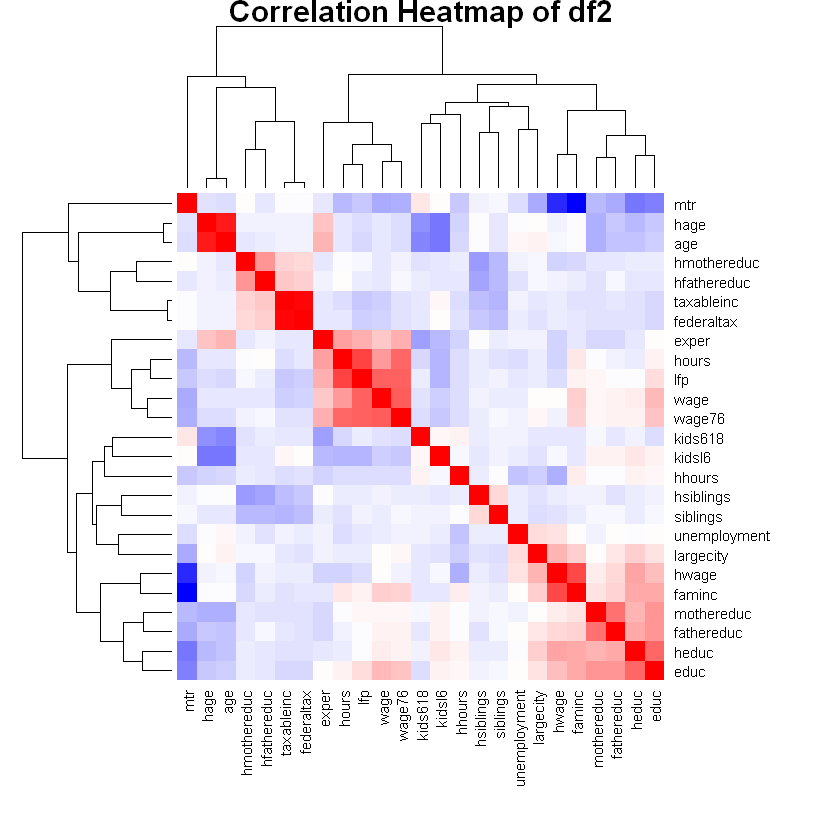

In [11]:
correlation_matrix <- cor(df2, use = "complete.obs")

heatmap(correlation_matrix, 
        col = colorRampPalette(c("blue", "white", "red"))(100),
        symm = TRUE,         
        margins = c(8, 8),   
        main = "Correlation Heatmap of df2")

In [12]:
vif(model5)

age         educ        exper       faminc   fathereduc         hage 
    5.261441     2.085816     1.334806     5.494674     1.647353     4.958138 
       heduc       hhours        hwage       kidsl6      kids618         wage 
    1.898938     1.587629     3.659968     1.346138     1.381228     1.369624 
  mothereduc          mtr unemployment 
    1.645617     6.228490     1.060082

In [13]:
model6 <- lm(hours ~ age + educ + exper + faminc + hhours + hwage + kidsl6  +
            wage  + mtr + unemployment, data = df2)

tidy(model6)
glance(model6)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),5.720767e+03,6.622272e+02,8.6386770,3.464404e-17
age,-2.823358e+01,3.566101e+00,-7.9172148,8.858432e-15
educ,-1.828395e+01,1.223935e+01,-1.4938658,1.356358e-01
exper,3.511494e+01,3.394298e+00,10.3452722,1.595033e-23
faminc,1.592231e-02,4.509078e-03,3.5311679,4.392850e-04
hhours,-3.461675e-01,5.018601e-02,-6.8976900,1.132866e-11
hwage,-1.100438e+02,1.066498e+01,-10.3182403,2.040707e-23
kidsl6,-3.193502e+02,5.231116e+01,-6.1048203,1.658396e-09
wage,5.188557e+01,8.657064e+00,5.9934370,3.204685e-09


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.432122,0.4244687,661.0119,56.46187,1.932607e-84,10,-5952.73,11929.46,11984.95,324207062,742,753


In [14]:
vif(model6)

age         educ        exper       faminc       hhours        hwage 
    1.426299     1.340540     1.291079     5.199919     1.537536     3.503601 
      kidsl6         wage          mtr unemployment 
    1.292953     1.355566     5.630740     1.052969

## Principal components analysis
Results are different from the book

In [15]:
scaled_data <- scale(df2)

In [16]:
pca_result <- prcomp(scaled_data, center = TRUE, scale = TRUE)

In [17]:
pca_components <- pca_result$rotation

# Extract standardized scores (principal component scores)
pca_scores <- pca_result$x

# Extract standard deviations of principal components
pca_std_dev <- pca_result$sdev

In [18]:
variance_explained <- pca_std_dev^2 / sum(pca_std_dev^2)

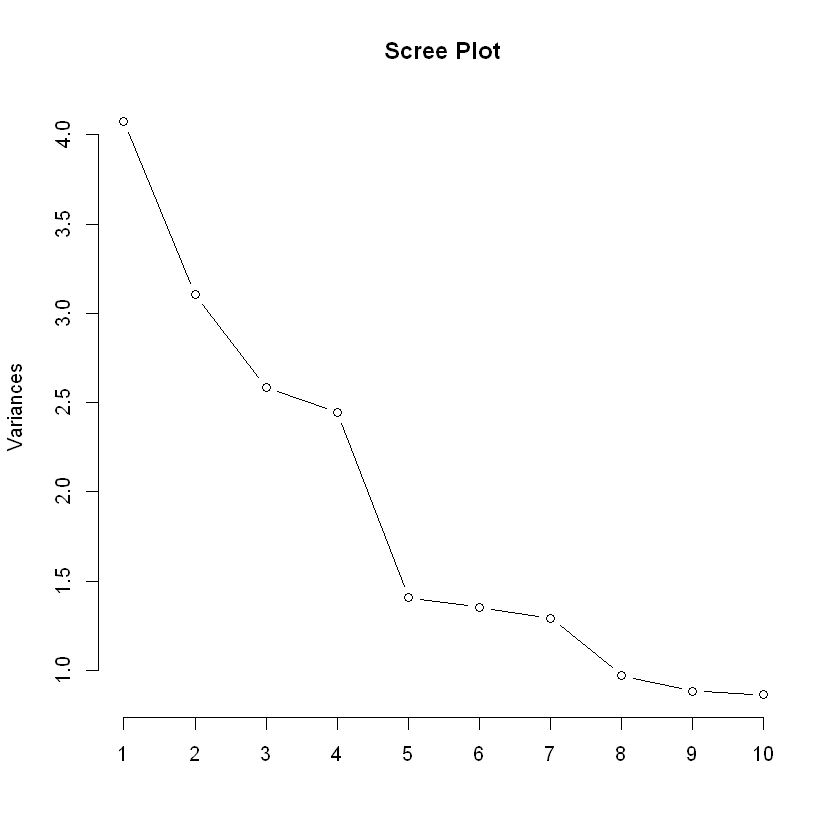

In [19]:
screeplot(pca_result, type = "lines", main = "Scree Plot")


In [20]:
summary(pca_result)

Importance of components:
                         PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     2.019 1.7615 1.6080 1.56381 1.18734 1.16346 1.13759
Proportion of Variance 0.163 0.1241 0.1034 0.09782 0.05639 0.05415 0.05176
Cumulative Proportion  0.163 0.2871 0.3906 0.48837 0.54476 0.59891 0.65067
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     0.98662 0.93992 0.93027 0.88700 0.85488 0.83909 0.79942
Proportion of Variance 0.03894 0.03534 0.03462 0.03147 0.02923 0.02816 0.02556
Cumulative Proportion  0.68961 0.72495 0.75956 0.79103 0.82027 0.84843 0.87399
                          PC15    PC16    PC17   PC18    PC19    PC20    PC21
Standard deviation     0.77286 0.71328 0.65361 0.6285 0.58349 0.56742 0.44504
Proportion of Variance 0.02389 0.02035 0.01709 0.0158 0.01362 0.01288 0.00792
Cumulative Proportion  0.89788 0.91824 0.93532 0.9511 0.96474 0.97762 0.98554
                          PC22    PC23    PC24

## Exercises

🚧 Under Construction